In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

df = pd.read_csv('data/spotify-2023.csv', encoding='latin1')

In [4]:
# 1 Filtra todas las canciones de un artista concreto y ordénalas de mayor a menor popularidad.

df["streams"] = pd.to_numeric(df["streams"].astype(str).str.replace(",", ""), errors='coerce')
df =df.dropna(subset=["streams"])

df["streams"] = df["streams"].astype(int)


df_taylor_swift = df[df["artist(s)_name"].str.contains("Taylor Swift",case=False,na=False)].sort_values("streams",ascending=False)




In [5]:
# 2 Muestra solo el nombre de las canciones, el artista y la popularidad, para las 10 primeras filas del dataset.

# df[["track_name","artist(s)_name","streams"]].head(10)
df.loc[:9,["track_name","artist(s)_name","streams"]]

,track_name,artist(s)_name,streams
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703
1,LALA,Myke Towers,133716286
2,vampire,Olivia Rodrigo,140003974
3,Cruel Summer,Taylor Swift,800840817
4,WHERE SHE GOES,Bad Bunny,303236322
5,Sprinter,"Dave, Central Cee",183706234
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",725980112
7,Columbia,Quevedo,58149378
8,fukumean,Gunna,95217315
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",553634067


In [16]:
# 3 Obtén todas las canciones que tengan un BPM mayor a 120 (ritmo rápido) y más de 1,000,000 de streams (popularidad)
filtro_canciones = (df["bpm"] > 120) & (df["streams"] > 1000000)
# df[filtro_canciones][["track_name","artist(s)_name","bpm","streams"]].sort_values(["bpm","streams"],ascending=False)

df.loc[filtro_canciones,["track_name","artist(s)_name","bpm","streams"]].sort_values(["bpm","streams"],ascending=False)



,track_name,artist(s)_name,bpm,streams
100,Lover,Taylor Swift,206,882831184
506,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",206,432719968
28,Last Night,Morgan Wallen,204,429829812
244,Until I Found You,Stephen Sanchez,202,726434358
447,It's the Most Wonderful Time of the Year,Andy Williams,202,663832097
...,...,...,...,...
268,Slut Me Out,NLE Choppa,121,190490915
512,Take My Breath,The Weeknd,121,130655803
508,How Do I Make You Love Me?,The Weeknd,121,119238316
336,Ainï¿½ï¿½ï¿½t Tha,Morgan Wallen,121,88791109


C:\Users\diego\AppData\Local\Temp\ipykernel_3332\4085224658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(top5artistas,x="artist(s)_name",y="total_visualizaciones",palette="viridis")


Text(0.5, 0, 'artistas')

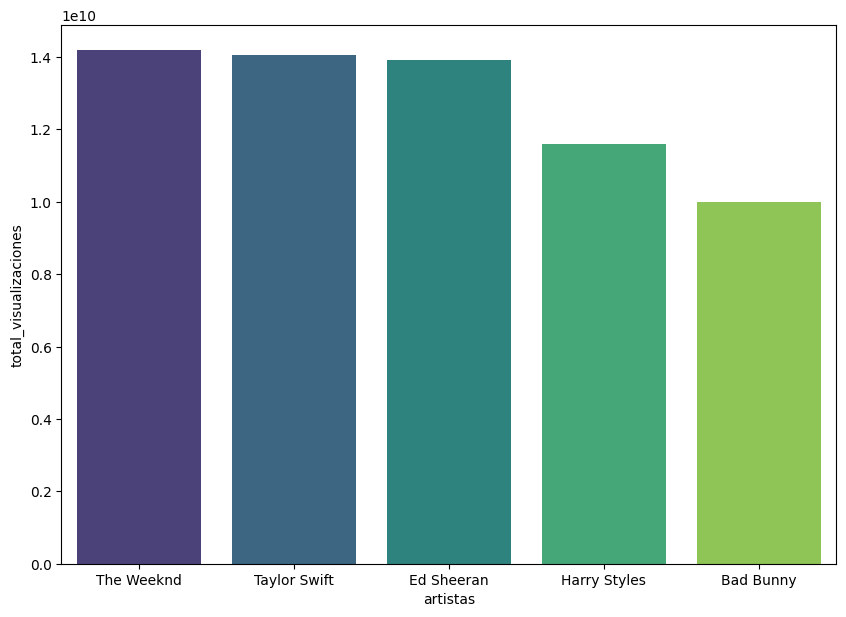

In [17]:
# 4 Haz un grafico de barras con los 5 artistas mas escuchados

visualizaciones_totales = df.groupby("artist(s)_name")["streams"].sum().sort_values(ascending=False)
top5artistas = visualizaciones_totales.iloc[:5].reset_index(name="total_visualizaciones")

plt.figure(figsize=(10,7))
sbn.barplot(top5artistas,x="artist(s)_name",y="total_visualizaciones",palette="viridis")
plt.xlabel("artistas")

In [ ]:
# 5 Calcula la media de streams por año y encuentra el año con mayor media.

media_streams_anho=df.groupby("released_year")["streams"].mean().astype(int) #si se usa reset_index(name= "media_streams") transforma serie en dataframe

top_media_anho = media_streams_anho.sort_values(by="media_streams",ascending=False).head(1)

top_media_anho_loc  = media_streams_anho.sort_values(by="media_streams",ascending=False).iloc[0]

# # top_media_anho
# # top_media_anho_loc

anho_top = media_streams_anho.idxmax()
media_top =media_streams_anho.max()

media_streams_anho,anho_top,media_top

# media_top





(released_year
 1930      90598517
 1942     395591396
 1946     389771964
 1950     473248298
 1952     395591396
 1957     459981011
 1958     436854312
 1959     286708922
 1963     437087793
 1968    1145727611
 1970     520034544
 1971     460492795
 1973     838586769
 1975    2103052676
 1979     403939487
 1982     175137725
 1983    1593270737
 1984     867906341
 1985    1115404970
 1986     566837918
 1987    1553497987
 1991    1029419894
 1992    1271293243
 1994    1449779435
 1995     968501958
 1996     106933107
 1997     103762518
 1998    1284942608
 1999    1080615564
 2000     983493509
 2002    1446620470
 2003    1584021370
 2004     878929559
 2005     180577478
 2007    1217120710
 2008    1240407950
 2010    1081405682
 2011     936321290
 2012    1341534278
 2013    1220192294
 2014    1264047139
 2015     993721360
 2016    1124607803
 2017    1367723437
 2018    1503052239
 2019    1051970349
 2020     937938698
 2021     620236159
 2022     289558154
 2023

In [94]:
# 6 Devuelve los 10 artistas con más canciones en el dataset.

df_artistas = df.copy()
df_artistas["artist(s)_name"] = df_artistas["artist(s)_name"].str.split(",")
df_artistas_explode= df_artistas.explode("artist(s)_name")
df_artistas_explode["artist(s)_name"] = df_artistas_explode["artist(s)_name"].str.strip()

df_artistas_explode.groupby("artist(s)_name")["track_name"].size().sort_values(ascending=False).head(10)

artist(s)_name
Bad Bunny         40
Taylor Swift      38
The Weeknd        37
SZA               23
Kendrick Lamar    23
Feid              21
Drake             19
Harry Styles      17
Peso Pluma        16
21 Savage         14
Name: track_name, dtype: int64

In [ ]:
# 7 Crea una nueva columna que exprese la energía de las canciones como un valor entre 0 y 1 (en lugar de porcentaje), redondeado a 2 decimales.

df["energy"] = (df["energy_%"]/100).round(2)






,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,energy
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,0.83
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,0.74
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,0.53
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,0.72
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,0.39
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,0.24
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,0.67
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,0.77


In [101]:
# 8 Crea una columna valence_level que diga 'alta' si valence_% > 60, si no 'baja'.
import numpy as np

df["valence_level"] = np.where(df["valence_%"] > 60, "alta","baja")

df


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,energy,valence_level
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,0.83,alta
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,0.74,alta
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,0.53,baja
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,0.72,baja
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,0.80,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,Major,60,24,39,57,0,8,3,0.39,baja
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,Major,42,7,24,83,1,12,6,0.24,baja
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,Major,80,81,67,4,0,8,6,0.67,alta
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,Major,82,67,77,8,0,12,5,0.77,alta


C:\Users\diego\AppData\Local\Temp\ipykernel_3332\275224290.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(data=df_energy,x="released_year",y="energy_mean",palette="viridis")


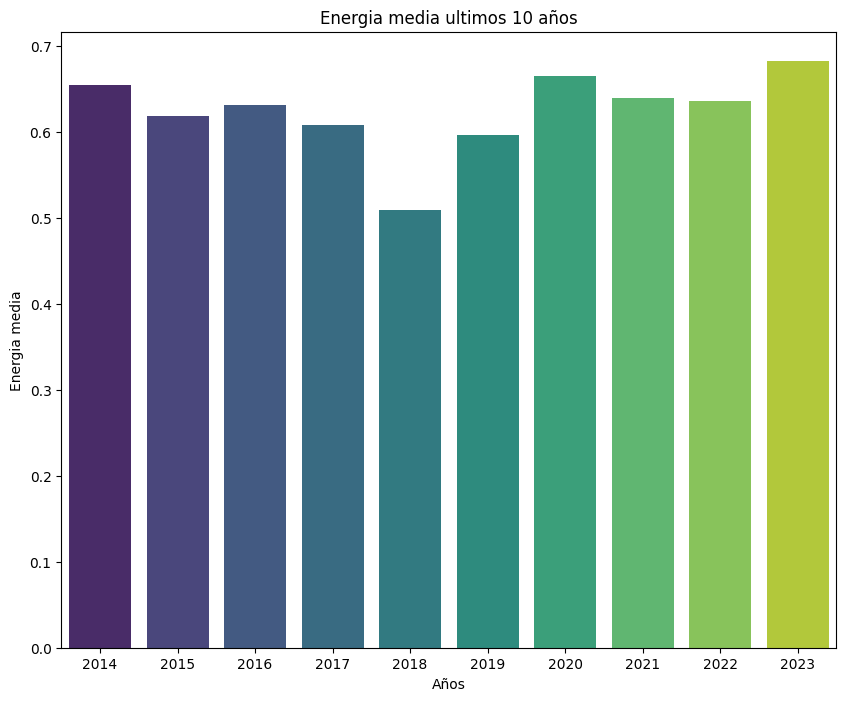

In [122]:
# 9 Agrupa por año y calcula la media de energy (ya normalizada) para ver si las canciones son más energéticas ahora que antes(ultimos 10 años).

df_energy = df.groupby("released_year")["energy"].mean().sort_index(ascending=False).head(10).reset_index(name="energy_mean")


# grafico
plt.figure(figsize=(10,8))
sbn.barplot(data=df_energy,x="released_year",y="energy_mean",palette="viridis")
plt.title("Energia media ultimos 10 años")
plt.xlabel("Años")
plt.ylabel("Energia media")
plt.show()

In [151]:
# 10 Agrupa las canciones por década y devuelve la más popular de cada grupo.

df["decade"] = (df["released_year"]//10)*10

max_index_decade =df.groupby("decade")["streams"].idxmax()

df.loc[max_index_decade,["decade","track_name","artist(s)_name","streams"]]





,decade,track_name,artist(s)_name,streams
439,1930,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",90598517
469,1940,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",395591396
443,1950,Rockin' Around The Christmas Tree,Brenda Lee,769213520
195,1960,Have You Ever Seen The Rain?,Creedence Clearwater Revival,1145727611
717,1970,Bohemian Rhapsody - Remastered 2011,Queen,2197010679
166,1980,Every Breath You Take - Remastered 2003,The Police,1593270737
65,1990,Yellow,Chris Molitor,1755214421
296,2000,Lose Yourself - Soundtrack Version,Eminem,1829992958
55,2010,Blinding Lights,The Weeknd,3703895074
84,2020,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922


In [ ]:
# 11 Determina qué 5 artistas tiene las canciones más alegres y enérgicas, considerando solo aquellos con al menos 10 canciones.


numero_canciones = df_artistas_explode.groupby("artist(s)_name")["track_name"].count().sort_values(ascending=False).reset_index(name="numero_canciones")

canciones = numero_canciones[numero_canciones["numero_canciones"] >= 10]

df_artistas_explode["media"] = ((df_artistas_explode["valence_%"] + df_artistas_explode["energy_%"])/2).round(2)


df_filtrado_top = df_artistas_explode[df_artistas_explode["artist(s)_name"].isin(canciones["artist(s)_name"])]

df_filtrado_top.sort_values(by="media",ascending=False)[["artist(s)_name","media"]].head(5)






,artist(s)_name,media
334,Morgan Wallen,91.5
144,Peso Pluma,90.5
882,BTS,90.5
176,Taylor Swift,87.5
220,Peso Pluma,87.0


In [202]:
# 12 Diseña una playlist de 10 canciones que empiece con canciones de alta energía y termine con canciones relajadas.

# columna energy alta energia: > 80, relajadas: < 30

canciones_alta_energia = df[df["energy_%"] > 80].sort_values(by="energy_%",ascending=False).head(5)
canciones_relajadas = df[df["energy_%"] < 30].sort_values(by="energy_%",ascending=True).head(5)

concatenacion = pd.concat([canciones_alta_energia,canciones_relajadas])

concatenacion






,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,energy,valence_level,decade
42,I'm Good (Blue),"Bebe Rexha, David Guetta",2,2022,8,26,12482,80,1109433169,291,...,56,38,97,4,0,35,4,0.97,baja,2020
319,Murder In My Mind,Kordhell,1,2022,1,21,2459,20,448843705,20,...,71,57,97,1,0,13,11,0.97,baja,2020
795,That That (prod. & feat. SUGA of BTS),"PSY, Suga",2,2022,4,29,802,0,212109195,16,...,91,91,96,3,0,3,9,0.96,alta,2020
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",2,2023,5,4,731,15,111947664,27,...,86,59,96,50,1,9,5,0.96,baja,2020
367,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",2,2022,11,3,1254,6,263453310,26,...,65,72,95,31,0,92,5,0.95,alta,2020
17,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,2023,7,13,873,104,30546883,80,...,44,14,9,96,0,10,3,0.09,baja,2020
326,Heart To Heart,Mac DeMarco,1,2019,5,10,1640,0,244658767,27,...,90,64,14,67,35,11,10,0.14,alta,2010
460,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,1,1946,11,1,11500,0,389771964,140,...,36,22,15,84,0,11,4,0.15,baja,1940
940,Sweet Nothing,Taylor Swift,1,2022,10,21,1747,0,186104310,9,...,34,39,16,97,0,12,5,0.16,baja,2020
704,"I'm Tired - From ""Euphoria"" An Original HBO Se...",Labrinth,1,2022,2,4,1888,0,121913181,26,...,28,26,20,19,0,30,3,0.20,baja,2020
